In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import time
import pickle
import statistics

from graph import Graph
from gls import GLS 

In [4]:

def draw_graph(graph, figsize=(6, 6)): 
    #Draws the graph   
    plt.figure(figsize=figsize)


    # Draw nodes
    for node in graph.nodes.values():
        plt.scatter(node.x, node.y, color="red" if graph.solution[node.id]== 1 else "blue" , s=200, edgecolors='black', zorder=3)  # Node
        plt.text(node.x, node.y, str(node.id), fontsize=12, ha='center', va='center', zorder=4)  # Label


    # Draw edges
    for node in graph.nodes.values():
        for neighbor_id in node.neighbors:
            neighbor = graph.nodes[neighbor_id]
            plt.plot([node.x, neighbor.x], [node.y, neighbor.y], 'gray', linewidth=1)  # Edge

   
    plt.title("Graph ")
    plt.axis("off")  # Hide axes
    plt.show()


In [5]:
graph = Graph("my_mini_graph.txt")  
graph.set_random_solution( 42)  
draw_graph(graph)  # Draw it
print(graph.solution)  # Print the solution

AttributeError: 'Graph' object has no attribute 'solution'

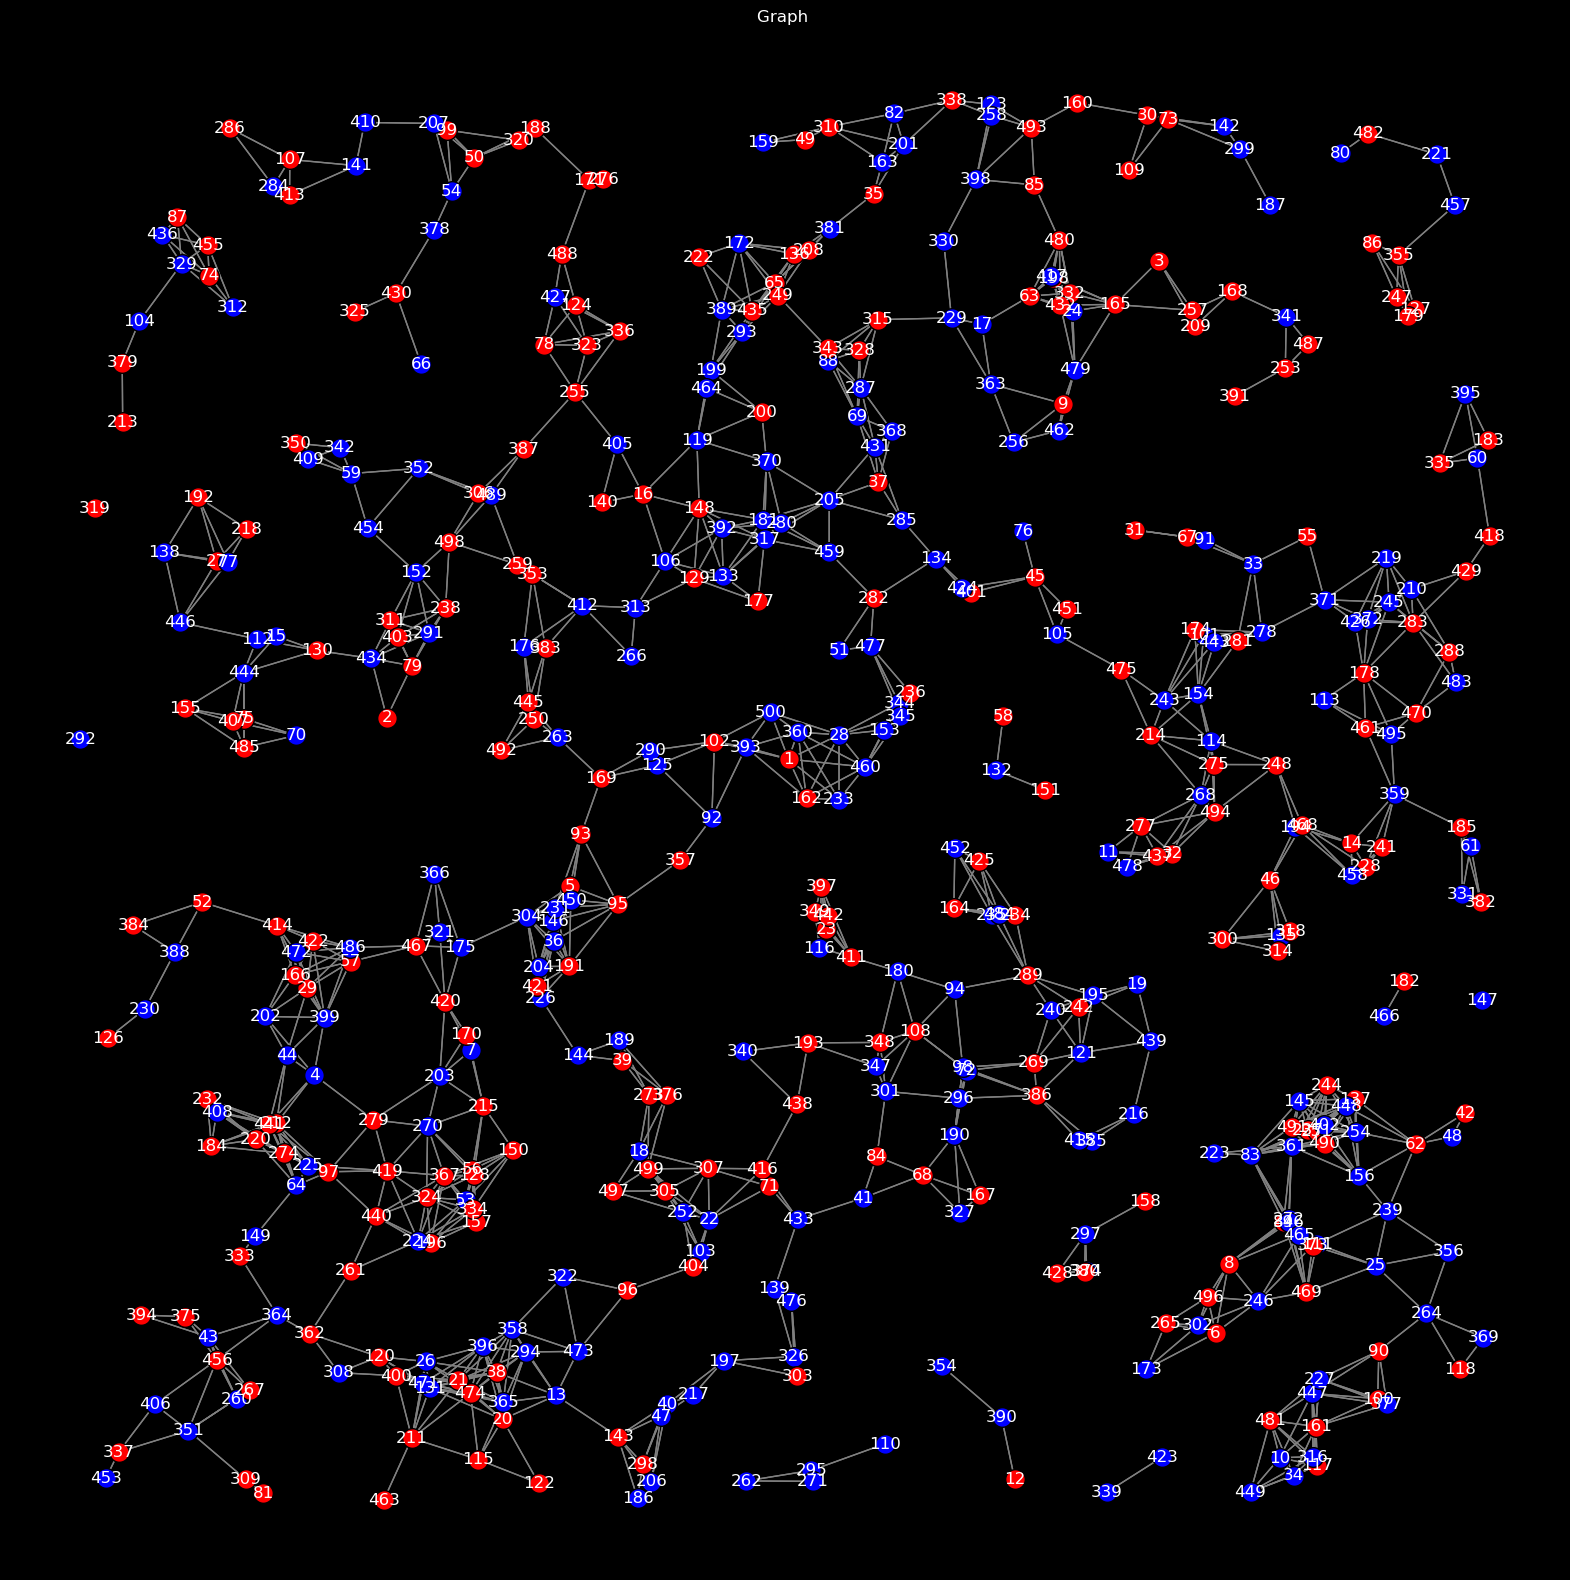

In [ ]:
graph = Graph("Graph500.txt")  
graph.set_random_solution()
draw_graph(graph,(20, 20))  # Draw it

In [12]:
 
def draw_graph(graph, solution, figsize=(6, 6)):
   
    plt.figure(figsize=figsize)
    
    # moved edges first so that nodes appear on top ! 
    for node in graph.nodes.values():
        for neighbor_id in node.neighbors:
            neighbor = graph.nodes[neighbor_id]
            # Check if the nodes are in different partitions (red vs blue)
            if solution[node.id] != solution[neighbor.id]:
                # Draw edge as green and extra thicc
                plt.plot([node.x, neighbor.x], [node.y, neighbor.y], color="green", linewidth=6)
            else:                
                plt.plot([node.x, neighbor.x], [node.y, neighbor.y], color="gray", linewidth=1)
    
    # Draw nodes with colors 
    for node in graph.nodes.values():
        partition = solution[node.id]
        color = "red" if partition == 1 else "blue"
        plt.scatter(node.x, node.y, color=color, s=200, edgecolors='black', zorder=3)
        plt.text(node.x, node.y, str(node.id), fontsize=12, ha='center', va='center', zorder=4)
    
    plt.title("Graph Partition")
    plt.axis("off")
    plt.show()


In [20]:
graph_filename = "Graph500.txt"
pop_size = 500
max_iterations = 300
random_seed = 42

# Run the GLS
gls = GLS(
    graph_filename=graph_filename,
    pop_size=pop_size,
    max_iterations=max_iterations,
    random_seed=random_seed
)
best_cut = gls.run_gls()
stats = gls.get_run_statistics()

print(f"GLS best cut size for pop_size={pop_size}: {best_cut}")
print("Run statistics:")
print(stats)

best_solution = gls.best_solution

#for the graph 
graph = Graph(graph_filename)

#pickle the solution with time stamp 
timestamp = time.strftime("%Y%m%d-%H%M%S")
solution_filename = f"solution_with_pop_size{pop_size}_with_iter_{max_iterations}_seed{random_seed}_{timestamp}.pkl"
with open(solution_filename, "wb") as f:
    pickle.dump(best_solution, f)
    print(f"Solution saved to {solution_filename}")

KeyboardInterrupt: 

Number of nodes in each partition:
1    250
0    250
Name: count, dtype: int64


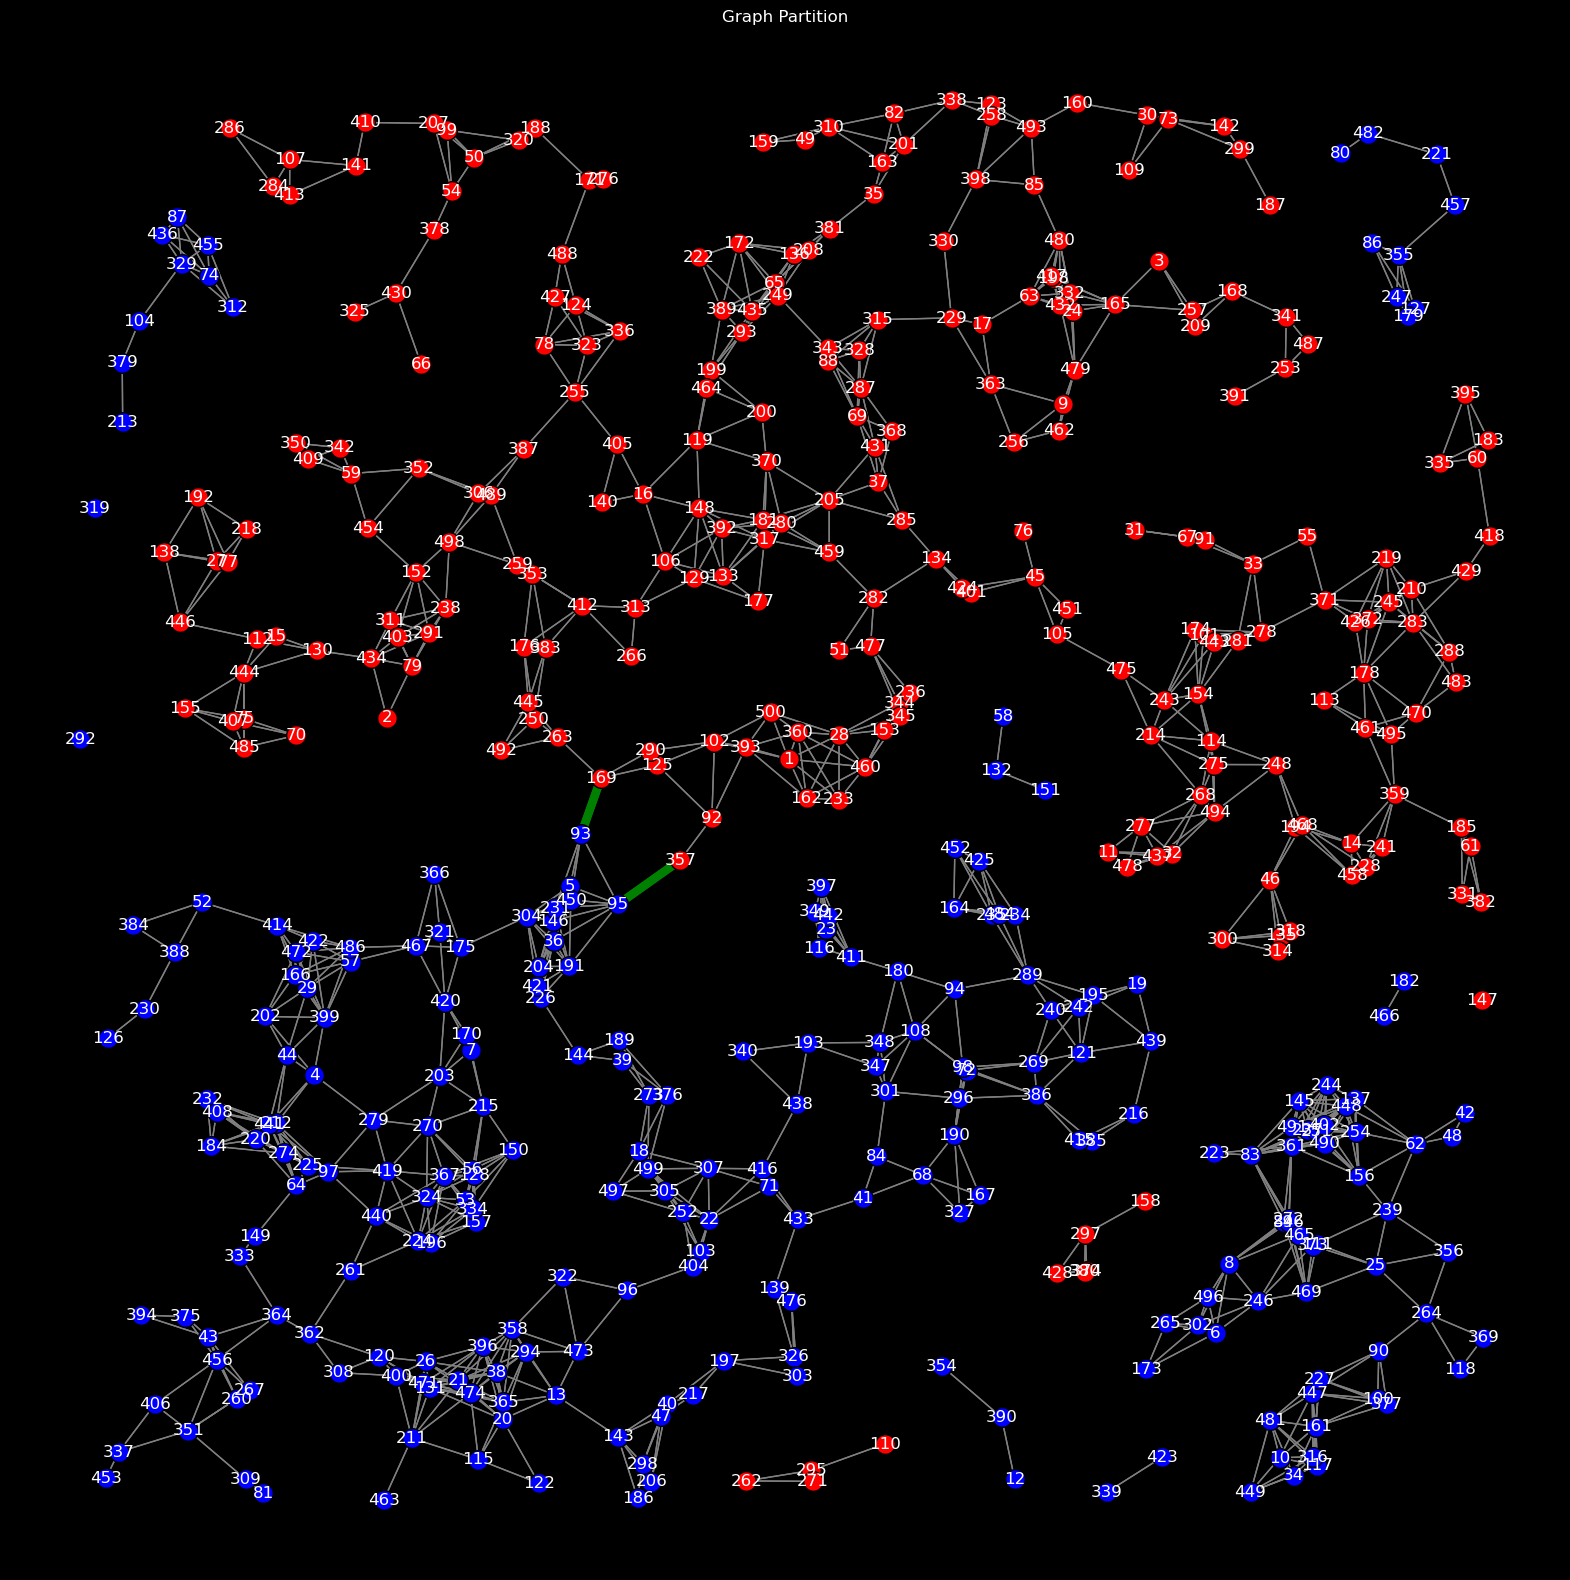

In [18]:
print("Number of nodes in each partition:")
print(pd.Series(best_solution).value_counts())
draw_graph(graph, best_solution, figsize=(20, 20))



In [14]:
import pickle 

Graph has 500 vertices and 1282 edges.
Solver status: Optimal
Optimal balanced bisection cut size: 2
Partition 1 (size 250): [4, 5, 6, 7, 8, 10, 12, 13, 18, 19, 20, 21, 22, 23, 25, 26, 29, 34, 36, 38, 39, 40, 41, 42, 43, 44, 47, 48, 52, 53, 56, 57, 58, 62, 64, 68, 71, 72, 80, 81, 83, 84, 86, 89, 90, 93, 94, 95, 96, 97, 98, 100, 103, 108, 110, 111, 115, 116, 117, 118, 120, 121, 122, 126, 127, 128, 131, 132, 137, 139, 143, 144, 145, 146, 149, 150, 151, 156, 157, 158, 161, 164, 166, 167, 170, 173, 175, 179, 180, 182, 184, 186, 189, 190, 191, 193, 195, 196, 197, 202, 203, 204, 206, 211, 212, 215, 216, 217, 220, 221, 223, 224, 225, 226, 227, 230, 231, 232, 234, 235, 237, 239, 240, 242, 244, 246, 247, 251, 252, 254, 260, 261, 262, 264, 265, 267, 269, 270, 271, 272, 273, 274, 279, 289, 294, 295, 296, 297, 298, 301, 302, 303, 304, 305, 307, 308, 309, 316, 319, 321, 322, 324, 326, 327, 333, 334, 337, 339, 340, 346, 347, 348, 349, 351, 354, 355, 356, 357, 358, 361, 362, 364, 365, 366, 367, 369, 